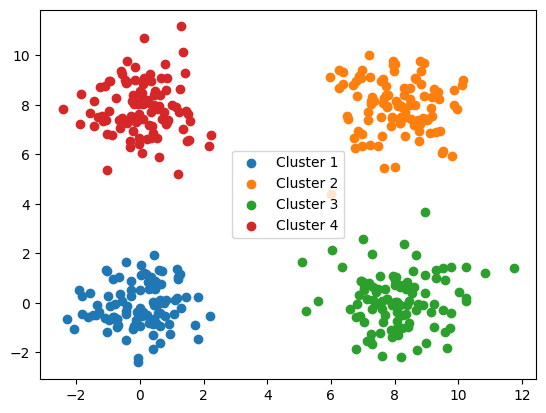

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def hierarchical_clustering(x):
    n = x.shape[0]
    clusters = [{i} for i in range(n)]
    while len(clusters) > 4:
        min_dist = float('inf')
        merge_i, merge_j = -1, -1
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = min([np.linalg.norm(x[p1] - x[p2]) for p1 in clusters[i] for p2 in clusters[j]])
                if dist < min_dist:
                    min_dist = dist
                    merge_i, merge_j = i, j
        clusters[merge_i] = clusters[merge_i].union(clusters[merge_j])
        del clusters[merge_j]
    return clusters

n = 100
x1 = np.random.randn(n, 2)
x2 = np.random.randn(n, 2) + np.array([8, 8])
x3 = np.random.randn(n, 2) + np.array([8, 0])
x4 = np.random.randn(n, 2) + np.array([0, 8])
x = np.vstack((x1, x2, x3, x4))



result = hierarchical_clustering(x)

for i, cluster in enumerate(result):
    cluster_points = np.array([x[j] for j in cluster])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.legend()
plt.show()
